In [2]:
import numpy as np
import pandas as pd

np.random.seed(23) 

# Generating samples for class 1
mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

# Generating samples for class 2
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0

# Concatenating the two DataFrames
df = pd.concat([df, df1], ignore_index=True)

# Randomly shuffling the DataFrame rows
df = df.sample(frac=1).reset_index(drop=True)



In [3]:
df.head()

,feature1,feature2,feature3,target
0,-0.367548,-1.137460,-1.322148,1
1,0.177061,-0.598109,1.226512,0
2,0.420623,0.411620,-0.071324,1
3,1.968435,-0.547788,-0.679418,1
4,-2.506230,0.146960,0.606195,1


In [4]:
import plotly.express as px

In [7]:

import plotly.express as px
import pandas as pd
import numpy as np

# Sample DataFrame
df = pd.DataFrame({
    'feature1': np.random.rand(10),
    'feature2': np.random.rand(10),
    'feature3': np.random.rand(10),
    'target': np.random.randint(0, 2, size=10)
})

# Plotly 3D Scatter Plot
fig = px.scatter_3d(df, x='feature1', y='feature2', z='feature3',
                    color=df['target'].astype('str'))

# Customize the plot
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Save the plot as an HTML file
fig.write_html("plot.html")

print("Plot saved as plot.html. Open this file in a browser to view the plot.")

     

Plot saved as plot.html. Open this file in a browser to view the plot.


In [10]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [11]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[ 1.11111111  0.55676499  0.0034193 ]
 [ 0.55676499  1.11111111 -0.54495084]
 [ 0.0034193  -0.54495084  1.11111111]]


In [12]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [13]:
eigen_values

array([0.33032445, 1.11452962, 1.88847926])

In [14]:
eigen_vectors


array([[ 5.05840388e-01, -6.99483670e-01, -5.04824819e-01],
       [-7.06330674e-01,  9.41211590e-05, -7.07882031e-01],
       [-4.95199436e-01, -7.14648575e-01,  4.94019162e-01]])

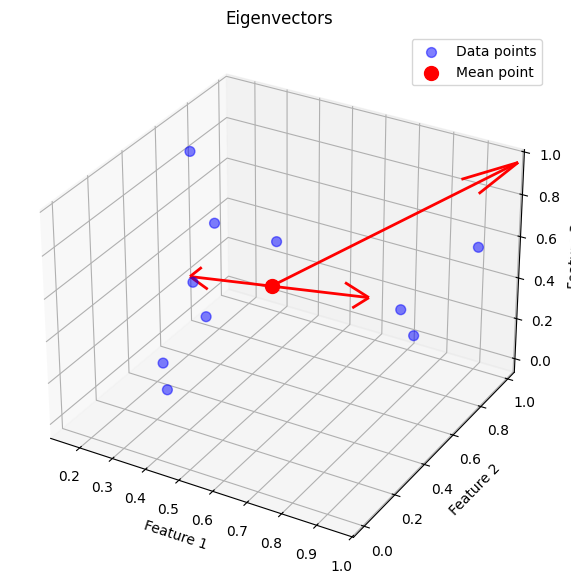

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate a sample DataFrame
np.random.seed(23)
df = pd.DataFrame({
    'feature1': np.random.rand(10),
    'feature2': np.random.rand(10),
    'feature3': np.random.rand(10),
    'target': np.random.randint(0, 2, size=10)
})

# Dummy eigenvectors (replace with actual eigenvectors if available)
eigen_vectors = np.array([[0.5, 0.5, 0.5], [-0.5, 0.5, -0.5], [0.5, -0.5, 0.5]])

# Mean point of the dataset
mean_x, mean_y, mean_z = df['feature1'].mean(), df['feature2'].mean(), df['feature3'].mean()

# Plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points
ax.scatter(df['feature1'], df['feature2'], df['feature3'], c='blue', alpha=0.5, s=50, label='Data points')

# Plot the mean point
ax.scatter(mean_x, mean_y, mean_z, c='red', s=100, label='Mean point')

# Add arrows for eigenvectors
for v in eigen_vectors:
    ax.quiver(
        mean_x, mean_y, mean_z,  # Starting point of the arrow
        v[0], v[1], v[2],       # Direction vector of the arrow
        color='red', linewidth=2, arrow_length_ratio=0.2
    )

# Set labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Eigenvectors')
plt.legend()

plt.show()


In [22]:
pc = eigen_vectors[0:2]
pc
  

array([[ 0.5,  0.5,  0.5],
       [-0.5,  0.5, -0.5]])

In [23]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.671115,-0.668650,0
1,1.228589,-0.344557,1
2,0.880443,0.004505,0
3,0.291667,0.008743,0
4,0.876397,-0.286815,0
